In [1]:
import warnings
warnings.filterwarnings("ignore", category=DeprecationWarning)

In [2]:
import numpy as np
import pandas as pd
import gc

In [3]:
path = "../Data/"

In [4]:
print("Read the properties and merge with coord")
prop = pd.read_csv(path + 'renamed_properties_2016.csv')
print "Size of the properties data frame: ", prop.shape

Read the properties and merge with coord


C:\Users\Amin\Anaconda2\lib\site-packages\IPython\core\interactiveshell.py:2723: DtypeWarning: Columns (33,35) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


Size of the properties data frame:  (2985217, 59)


In [5]:
train = pd.read_csv(path + 'renamed_train_2016.csv')
train = pd.merge(train, prop, on="id_parcel", how="left")
del prop
gc.collect()

28

In [6]:
train["latitude"] = train["latitude"] / 1e6
train["longitude"] = train["longitude"] / 1e6

In [11]:
position = ["region_city", "region_county", "region_neighbor", "region_zip", "zoning_landuse_county", 
             "zoning_property", "censustractandblock", "rawcensustractandblock"]

In [12]:
ll = ["build_year", "logerror"]

In [13]:
train.build_year.min()

1885.0

In [14]:
train.loc[train.build_year == 1885, position+ll]

,region_city,region_county,region_neighbor,region_zip,zoning_landuse_county,zoning_property,censustractandblock,rawcensustractandblock,build_year,logerror
12855,11626.0,3101.0,NaN,96486.0,0100,GDE4,6.037401e+13,60374010.0,1885.0,0.0000
22073,47019.0,3101.0,274695.0,96292.0,0100,PSR1,6.037462e+13,60374620.0,1885.0,0.1098
34325,20008.0,3101.0,NaN,96508.0,0100,POR3YY,6.037402e+13,60374023.0,1885.0,0.0478
38339,47019.0,3101.0,273539.0,96292.0,0101,PSR6,6.037461e+13,60374614.0,1885.0,-0.0305
39187,12447.0,3101.0,268496.0,95992.0,0100,LAR2,6.037229e+13,60372292.0,1885.0,0.0325
57017,12447.0,3101.0,268404.0,95996.0,0200,LARD1.5,6.037224e+13,60372242.0,1885.0,0.1222


In [15]:
train.loc[train.region_zip == 96292, "logerror"].mean()

0.027395769230769227

In [37]:
df = train.loc[train.region_zip == 96292, :]
df.shape

(260, 62)

In [38]:
y = train.logerror
mid = np.percentile(y, 50)
y = y - mid
q1 = np.percentile(y, 25)
q3 = np.percentile(y, 75)
print q1, q3
interval = q3 - q1
fac = 4.0
interval = interval * fac / 2.
hi = interval + mid
lo = -interval + mid
print hi, lo

-0.0313 0.0332
0.135 -0.123


In [39]:
index_hi = df.logerror > hi   # drop 1480 points 
index_lo = df.logerror < lo    # drop 947 points
print sum(index_hi), sum(index_lo)

df = df[(~index_lo) & (~index_hi)]

print "Size of the x1 data frame: ", df.shape

22 13
Size of the x1 data frame:  (225, 62)


In [41]:
import seaborn as sns
import matplotlib.pyplot as plt
color = sns.color_palette()

%matplotlib inline

In [42]:
med_lat = np.median(df.latitude)
st_lat = np.std(df.latitude)
med_lon = np.median(df.longitude)
st_lon = np.std(df.longitude)

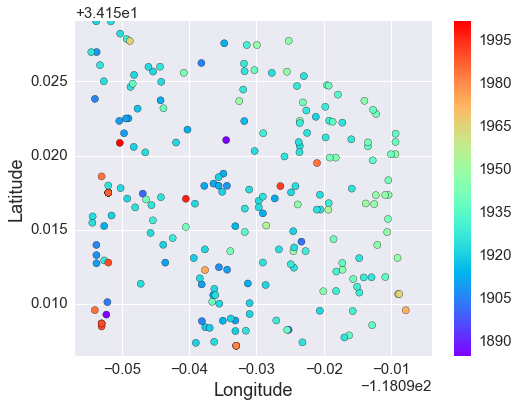

In [43]:
sns.set(font_scale=1.5)
#cmap = sns.cubehelix_palette(as_cmap=True)
#cmap = sns.diverging_palette(240, 10, s=80, l=55, n=9, as_cmap=True)
cmap = plt.get_cmap('rainbow')

f, ax = plt.subplots(figsize=(8,6))
points = ax.scatter(df["longitude"].values, df["latitude"].values, c=df["build_year"].values, s=50, cmap=cmap)
f.colorbar(points)

plt.xlim([med_lon-1.8*st_lon, med_lon+2.0*st_lon])
plt.ylim([med_lat-1.8*st_lat, med_lat+2.0*st_lat])

plt.xlabel('Longitude', fontsize=18)
plt.ylabel('Latitude', fontsize=18)

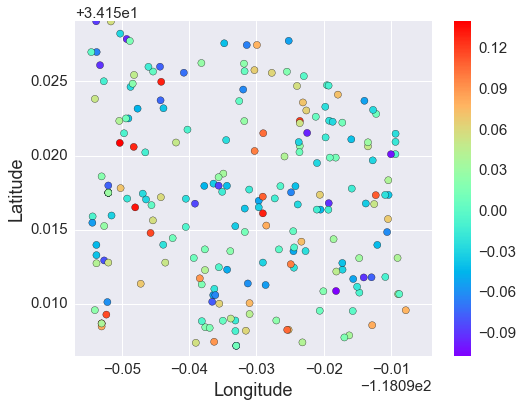

In [44]:
error = df["logerror"].values - np.median(df["logerror"].values)

sns.set(font_scale=1.5)
#cmap = sns.diverging_palette(240, 10, s=80, l=55, n=9, as_cmap=True)

f, ax = plt.subplots(figsize=(8,6))
points = ax.scatter(df["longitude"].values, df["latitude"].values, c= error, s=50, cmap=cmap)
f.colorbar(points)

plt.xlim([med_lon-1.8*st_lon, med_lon+2.0*st_lon])
plt.ylim([med_lat-1.8*st_lat, med_lat+2.0*st_lat])

plt.xlabel('Longitude', fontsize=18)
plt.ylabel('Latitude', fontsize=18)

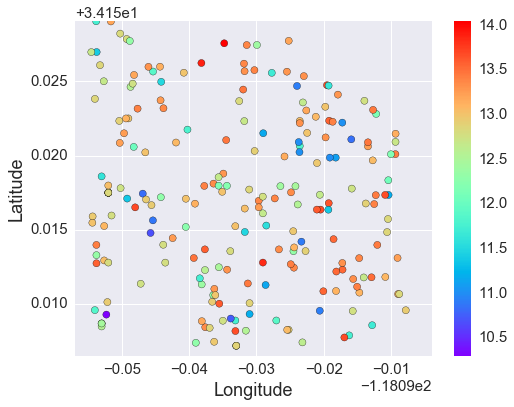

In [45]:
sns.set(font_scale=1.5)
#cmap = sns.cubehelix_palette(as_cmap=True)
#cmap = sns.diverging_palette(240, 10, s=80, l=55, n=9, as_cmap=True)
cmap = plt.get_cmap('rainbow')

f, ax = plt.subplots(figsize=(8,6))
points = ax.scatter(df["longitude"].values, df["latitude"].values, c=np.log(df["tax_total"].values), s=50, cmap=cmap)
f.colorbar(points)

plt.xlim([med_lon-1.8*st_lon, med_lon+2.0*st_lon])
plt.ylim([med_lat-1.8*st_lat, med_lat+2.0*st_lat])

plt.xlabel('Longitude', fontsize=18)
plt.ylabel('Latitude', fontsize=18)

In [25]:
df.columns

Index([u'id_x', u'id_parcel', u'logerror', u'date', u'id_y', u'type_aircon',
       u'type_architectural', u'area_basement', u'num_bathroom',
       u'num_bedroom', u'type_framing', u'type_quality', u'num_bathroom_calc',
       u'type_deck', u'area_firstfloor_finished', u'area_total_calc',
       u'area_live_finished', u'area_liveperi_finished',
       u'area_total_finished', u'area_unknown', u'area_base', u'fips',
       u'num_fireplace', u'num_bath', u'num_garage', u'area_garage',
       u'flag_tub', u'type_heating', u'latitude', u'longitude', u'area_lot',
       u'num_pool', u'area_pool', u'pooltypeid10', u'pooltypeid2',
       u'pooltypeid7', u'zoning_landuse_county', u'type_zoning_landuse',
       u'zoning_property', u'rawcensustractandblock', u'region_city',
       u'region_county', u'region_neighbor', u'region_zip', u'num_room',
       u'type_story', u'num_75_bath', u'type_material', u'num_unit',
       u'area_patio', u'area_shed', u'build_year', u'num_story',
       u'flag_fire